In [236]:
event_sequences = {
            'infancy': [ 'parents', 'playing'], # life, firsts, parents
            'childhood': [ 'kindergarten' ],  # kindergarten, learning, friends, parents
            'adolescence': [ 'school', 'prom', 'first_drink', 'party' ],  # highschool, parties, friends, romance
            'early_adult': [ 'moving_out', 'university', 'twenty_first', 'graduation', 'work' ], # independence, travel, graduation, early career
            'mid_adult': [ 'marriage', 'children' ], # settling down, career, marriage, children
            'late_adult': [ 'retirement', 'grandchildren', 'spouse_death', 'sickness' ] # retirement, grandchildren
        }

import os
import random
import copy
def get_image_map():
    image_map = {}
    base_path = 'temp/downloads/'
    for life_stage in os.listdir(base_path):
        image_map[life_stage] = { 'filler': [] }

        for item in os.listdir(base_path+life_stage):
            if os.path.isdir('{}{}/{}'.format(base_path, life_stage, item)): # if there is a folder of images
                image_map[life_stage][item] = [] # create an array of paths
                for folder_image in os.listdir('{}{}/{}'.format(base_path, life_stage, item)):
                    image_map[life_stage][item].append('{}{}/{}/{}'.format(base_path, life_stage, item, folder_image))

            else:
                image_map[life_stage]['filler'].append('{}{}/{}'.format(base_path, life_stage, item))
        
    return image_map

image_map = get_image_map()

def random_pop(arr):
    return arr.pop(random.randrange(len(arr)))

class Story:
    def __init__(self, num_pages):
        self.num_pages = num_pages
        self.events = self.init_events()
    def init_events(self):
        class Event:
            def __init__(self, name=None, index=None, life_stage=None, images=[], moment=None):
                self.name = name
                self.index = index
                self.life_stage = life_stage
                self.images = images
                self.moment = moment
        
        event_map = copy.deepcopy(event_sequences)
        events = []
        life_stages = list(rite_of_passages)
        life_map = copy.deepcopy(image_map)
        for i in range(self.num_pages):
            life_stage = ''
            images = []
            moment = None
            if i == 0:
                life_stage = 'birth'
                birth_image = random.choice(life_map['birth']['filler'])
                images.append(birth_image)
            elif i == self.num_pages - 1:
                life_stage = 'death'
            else:
                i = i - 1 
                mapped_index = math.floor((i / (self.num_pages - 2)) * len(life_stages))
                life_stage = life_stages[mapped_index]
                if len(event_map[life_stage]) > 0: # if there are events left to be added
                    moment = event_map[life_stage].pop(0) # pick next life event and remove from array
                    while len(images) < 5: # pick between 3 to 5 images
                        if len(life_map[life_stage][moment]) > 0: 
                            image = random_pop(life_map[life_stage][moment])
                        elif len(life_map[life_stage]['filler']) > 0: # if out of moment images, use filler
                            image = random_pop(life_map[life_stage]['filler']) 
                        else: # if out of filler images, break
                            break
                        images.append(image)
                    if len(life_map[life_stage][moment]) > 0:
                        life_map[life_stage]['filler'] = life_map[life_stage]['filler'] + life_map[life_stage][moment] # if there are pictures left in the life event, chuck them in the filler array
                else: # if generic page ( no event )
                    while len(images) < 5: # pick between 2 to 3 images
                        if len(life_map[life_stage]['filler']) > 0: # pick first from filler images
                            image = random_pop(life_map[life_stage]['filler'])
                        else: # if out of images to pick from, break
                            print(life_stage, 'out of filler')
                            break
                        images.append(image)           

                i = i + 1

            event = Event(index=i, life_stage=life_stage, images=images, moment=moment)
            events.append(event)
        return events

z = Story(28)
for event in z.events:
    print(len(event.images))
#     print('#{} || {} || {} || {}'.format(event.index, event.life_stage, event.moment, event.images[0] if len(event.images) > 0 else None))
#     print('#{:02d }|| {} || {} || {}\n\n==========================\n'.format(event.index, event.life_stage, event.moment, event.images))

infancy out of filler
1
5
5
5
5
4
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
0


temp/downloads/infancy/parents/pexels-photo-102170.jpeg
temp/downloads/infancy/playing/boy-2861417_1280.jpg
temp/downloads/infancy/playing/pexels-photo-83761.jpeg
temp/downloads/infancy/playing/photo-1506102785777-2744046d4da8?auto=format&fit=crop&w=2552&q=60&ixid=dW5zcGxhc2guY29tOzs7Ozs%3D.jpeg
temp/downloads/infancy/photo-1497445462247-4330a224fdb1?auto=format&fit=crop&w=1534&q=60&ixid=dW5zcGxhc2guY29tOzs7Ozs%3D.jpeg


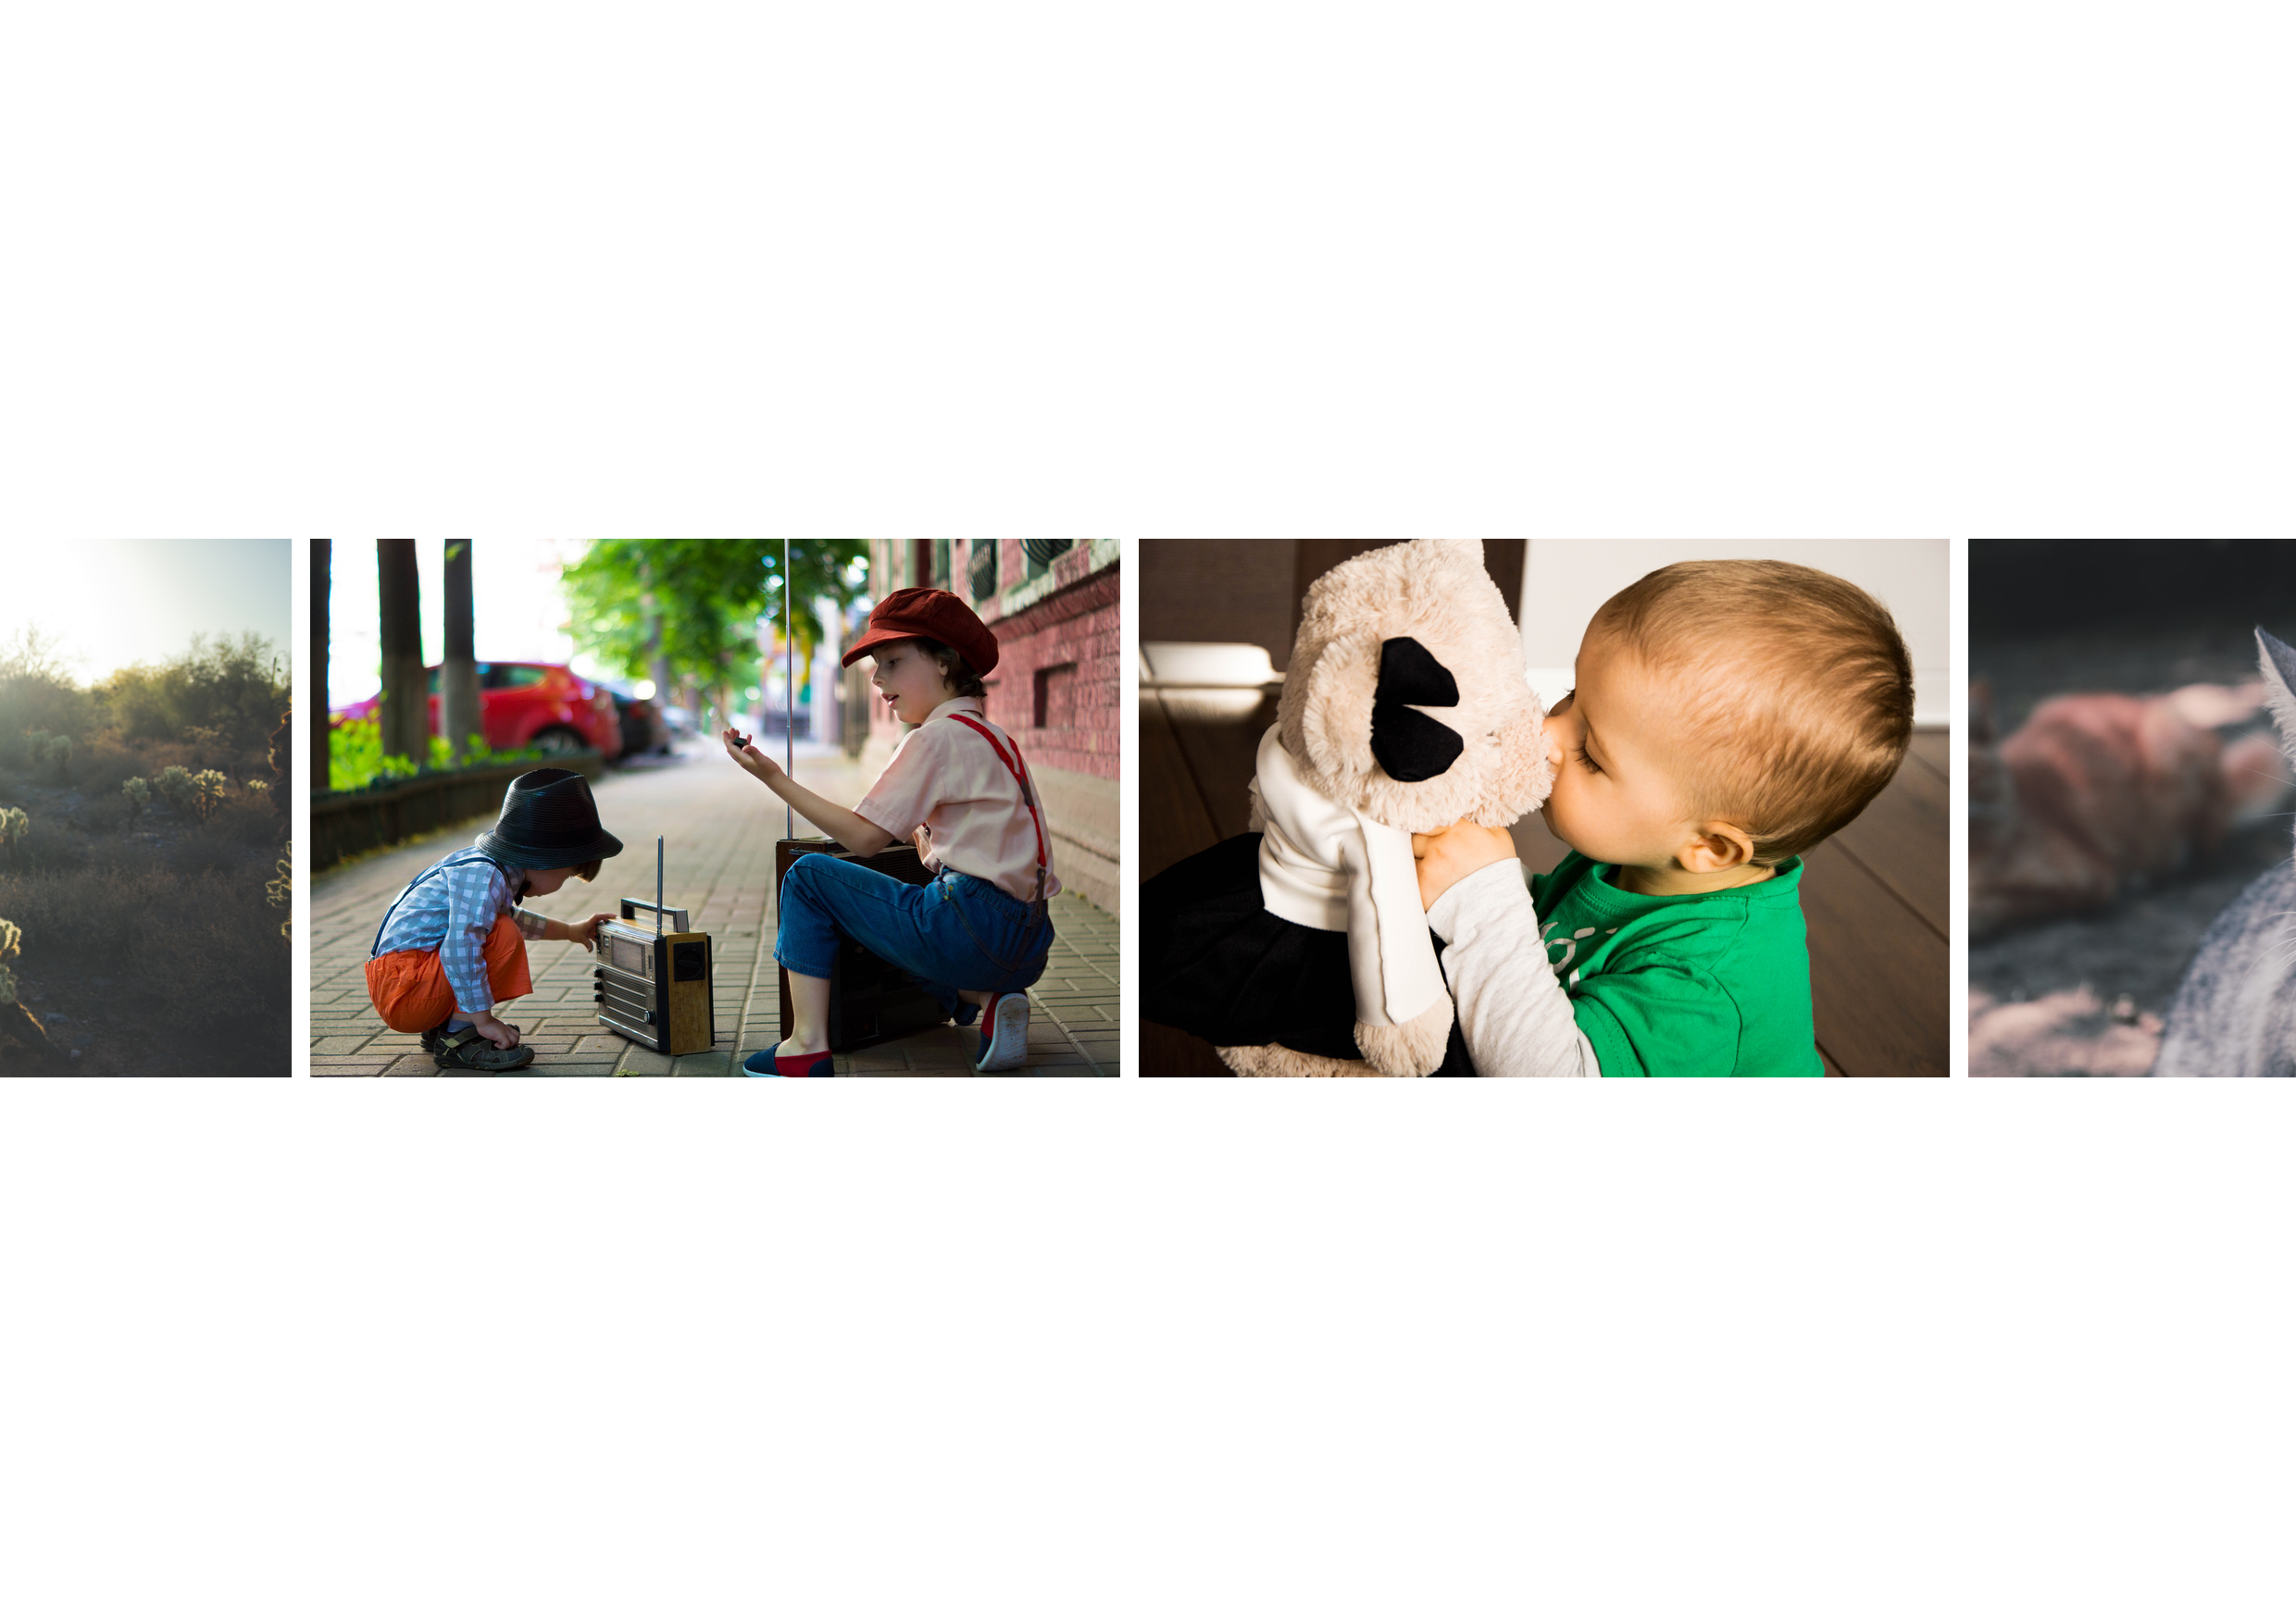

In [ ]:
# debug image drawing
from PIL import Image, ImageDraw
from IPython.display import Image as PyImage
import copy
def randrange(r):
    return random.randrange(int(r[0]), int(r[1]))
       
class Page_Element:
    def __init__(self, x, y, max_h, url, rectmode=None):
        self.x = x
        self.y = y
        self.max_h = max_h
        self.url = url
        self.rectmode = rectmode
        # load image and work out width and heights
        img_obj = Image.open(open(self.url, 'rb'))
        img_obj.thumbnail((10000, self.max_h), Image.ANTIALIAS)
        img_w, img_h = img_obj.size
        self.w = img_w
        self.h = img_h
    def draw(self, page):
        img_obj = Image.open(open(self.url, 'rb'))
        img_obj.thumbnail((10000, self.max_h), Image.ANTIALIAS)
        x_val = self.x
        y_val = self.y
        if self.rectmode == 'CENTER':
            x_val = self.x - self.w/2
            y_val = self.y - self.h/2
        page.paste(img_obj, (int(x_val), int(y_val)))

overflowing_element = None
class Page:
    def __init__(self, w=100, h=100, page_number=0, position='L', elements=[], bg_color="white"):
        self.w = w
        self.h = h
        self.page_number = page_number
        self.position = position
        self.elements = []
        self.bg_color = bg_color
        self.init_elements(elements)
    def init_elements(self, elements):
        new_elements = []
        if len(elements) > 0:
            vertical_margin = self.h/3
            global overflowing_element
            for i in range(len(elements)):
                url = elements[i]
                if self.page_number == 0: # if birth page, render image in middle
                    x = self.w/2
                    y = vertical_margin
                    max_h = self.h - (vertical_margin * 2)
                else:
                    y = vertical_margin
                    max_h = self.h - (vertical_margin * 2)
                    
                    if len(new_elements) == 0: # look at last image on prev page if new page
                        prev_el = book[-1].elements[-1]
                        overflow_x = prev_el.x + prev_el.w + h_margin
                        overflow_image = Page_Element(x=overflow_x, y=y, max_h=max_h, url=url)
                        book[-1].elements.append(overflow_image)
                        x = prev_el.x + prev_el.w + h_margin - self.w
                        
                        if overflowing_element:
                            repeat_el = overflowing_element
                            repeat_el.x = repeat_el.x - self.w
                            new_elements.append(repeat_el)
                            overflowing_element = None
                    else:
                        prev_el = new_elements[-1]
                        x = prev_el.x + prev_el.w + h_margin

                new_element = Page_Element(x=x, y=y, max_h=max_h, url=url)           
                    
                if self.page_number == 0: # if birth page, move to center
                    new_element.x = new_element.x - new_element.w/2
                    
                # only add to page if it within page
                right = new_element.x + new_element.w
                left = new_element.x
             
                if (left < self.w and right > 0): 
                    new_elements.append(new_element)
                    if right > self.w: # if overflowing, store it
                        overflowing_element = copy.deepcopy(new_element)

        self.elements = new_elements
                
    def draw(self, output_directory='one.png'):
        doc = Image.new('RGB', (self.w, self.h), self.bg_color)
        if len(self.elements) > 0:
            for i in self.elements:
                i.draw(page=doc)
        doc.save(output_directory, 'PNG')
# Create book, page by page =================================  
book = []
page_w = 2480
page_h = 1748
            
# Create cover
cover = Page(w=page_w, h=page_h, page_number='C', position='R', bg_color="black")
book.append(cover)
# Create inside cover
inside_cover = Page(w=page_w, h=page_h, page_number='IC', position='L')
book.append(inside_cover)       
# Collage pages
for e in z.events:
    position = 'R' if e.index % 2 == 0 else 'L'
    elements = e.images.copy()           
    collage_page = Page(w=page_w, h=page_h, page_number=e.index, position=position, elements=elements)
    book.append(collage_page)
# Create inside back cover
back_inside_cover = Page(w=page_w, h=page_h, page_number='BIC', position='R')
book.append(back_inside_cover)  
# Create back cover
back_cover = Page(w=page_w, h=page_h, page_number='BC', position='L', bg_color="black")
book.append(back_cover)

book[4].draw()
for e in book[4].elements:
    print(e.url)

PyImage(filename='one.png', width=500)

In [ ]:
# draw pages into a new directory
from PIL import Image, ImageDraw
from IPython.display import Image as PyImage
import time
import datetime
# create directory ====
timestamp = datetime.datetime.fromtimestamp(time.time()).strftime('%Y-%m-%d-%H%M%S%f')
image_dir = 'temp/outputs/images/{}/'.format(timestamp)
if not os.path.exists(image_dir):
    os.makedirs(image_dir)

# create pages for each event in the story object ====
for i in range(len(book)):
    page = book[i]
    page.draw(output_directory='{}{:02d}.png'.format(image_dir, i))

In [ ]:
# export directory of images into a multi page pdf
# https://stackoverflow.com/questions/27327513/create-pdf-from-a-list-of-images
from fpdf import FPDF
from PIL import Image
def makePdf(pdfFileName, listPages, dir = '', pdfpath=''):
    cover = Image.open(dir + str(listPages[0]))
    width, height = cover.size

    pdf = FPDF(unit = "pt", format = [width, height])

    for page in listPages:
        pdf.add_page()
        pdf.image(dir + str(page), 0, 0)
    print(pdfpath + ".pdf")
    pdf.output(pdfpath + ".pdf", "F")

image_paths = os.listdir(image_dir)
pdf_output_path = 'temp/outputs/pdfs/{}'.format(timestamp)
makePdf(timestamp, image_paths, dir=image_dir, pdfpath=pdf_output_path)
